In [8]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
dengue = pd.read_csv("D:\PC-STUDENT\Downloads\dengue.csv")

In [3]:
dengue

Month  Year    Region  Dengue_Cases  Dengue_Deaths
0       January  2016  Region I           705              1
1      February  2016  Region I           374              0
2         March  2016  Region I           276              0
3         April  2016  Region I           240              2
4           May  2016  Region I           243              1
...         ...   ...       ...           ...            ...
1015     August  2020     BARMM            91              0
1016  September  2020     BARMM            16              8
1017    October  2020     BARMM            13              9
1018   November  2020     BARMM            15              1
1019   December  2020     BARMM            23              0

[1020 rows x 5 columns]

In [4]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [5]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [6]:
dengue['Year'] = dengue['Year'].astype('int')

In [7]:
dengue.dtypes

Month            object
Year              int32
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

# 1. What year has the most Dengue cases?

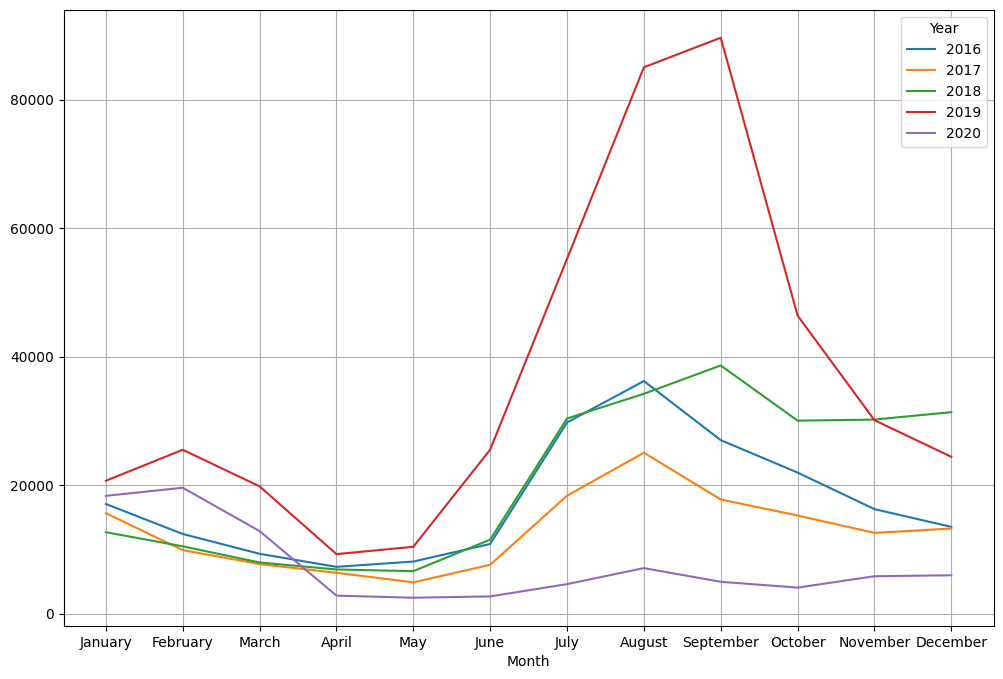

In [49]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

monthly_cases = dengue.groupby(['Month', 'Year'])["Dengue_Cases"].sum()

monthly_cases.unstack().plot(kind='line')
plt.gcf().set_size_inches(12,8)
plt.grid(True)
plt.xticks(range(0,12), month_order)
plt.show()

<h3>INSIGHTS 1: The year 2019 has the highest dengue cases compared to the other years, what might've the cause of this sudden spike?</h3>
<h3>INSIGHTS 2: The lowest year in the graph is the year 2020 where we can see that the dengue cases lowered a lot comparing to the spiked that happened in the year 2019. Basing on the graph and the lowered number of cases we can tell how the officials made a good work in maintaining our health.</h3>

In [50]:
Regional_Death = dengue.groupby(["Region"])[['Dengue_Deaths', 'Dengue_Cases']].sum().reset_index()
Regional_Death

Region  Dengue_Deaths  Dengue_Cases
0         BARMM            332         11537
1           CAR           1008         30582
2           NCR           4008        115966
3      Region I            157         59066
4     Region II            193         45141
5    Region III            482        131064
6   Region IV-A            652        163029
7   Region IV-B            130         30849
8     Region IX            532         47781
9      Region V            185         22167
10    Region VI           1825        117523
11   Region VII           1760        110683
12  Region VIII            585         51983
13     Region X            848         82437
14    Region XI            385         32522
15   Region XII           2796         59802
16  Region XIII            966         35293

In [51]:
# Calculate mortality rate
Regional_Death["Mortality_Rate"] = np.round((Regional_Death["Dengue_Deaths"] / Regional_Death["Dengue_Cases"]) * 100,2)

In [52]:
Regional_Death

Region  Dengue_Deaths  Dengue_Cases  Mortality_Rate
0         BARMM            332         11537            2.88
1           CAR           1008         30582            3.30
2           NCR           4008        115966            3.46
3      Region I            157         59066            0.27
4     Region II            193         45141            0.43
5    Region III            482        131064            0.37
6   Region IV-A            652        163029            0.40
7   Region IV-B            130         30849            0.42
8     Region IX            532         47781            1.11
9      Region V            185         22167            0.83
10    Region VI           1825        117523            1.55
11   Region VII           1760        110683            1.59
12  Region VIII            585         51983            1.13
13     Region X            848         82437            1.03
14    Region XI            385         32522            1.18
15   Region XII           2796         59802            4.68
16  Region XIII            966         35293            2.74